## Setting up OpenAI Gym Environment


In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install box2d-py gym[box2d] > /dev/null 2>&1

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install box2d-py gym[box2d] > /dev/null 2>&1
!pip install piglet > /dev/null 2>&1

In [ ]:
from pyvirtualdisplay import Display
Display().start()
from IPython import display
import matplotlib.pyplot as plt
import gym
from gym import wrappers
%matplotlib inline

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


# Value Iteration with Grid-World



In [ ]:
!git clone https://github.com/podondra/gym-gridworlds.git
!pip install gym-gridworlds

Cloning into 'gym-gridworlds'...
remote: Enumerating objects: 97, done.
remote: Total 97 (delta 0), reused 0 (delta 0), pack-reused 97
Unpacking objects: 100% (97/97), done.


In [ ]:
import gym
import gym_gridworlds
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Cliff-v0')

In [ ]:
import gym
from gym import spaces


class CliffEnv(gym.Env):
    def __init__(self):
        self.height = 4
        self.width = 12
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Tuple((
                spaces.Discrete(self.height),
                spaces.Discrete(self.width)
                ))
        self.moves = {
                0: (-1, 0),   # up
                1: (0, 1),   # right
                2: (1, 0),  # down
                3: (0, -1),  # left
                }

        # begin in start state
        self.reset()

    def step(self, action):
        x, y = self.moves[action]
        self.S = self.S[0] + x, self.S[1] + y

        self.S = max(0, self.S[0]), max(0, self.S[1])
        self.S = (min(self.S[0], self.height - 1),
                  min(self.S[1], self.width - 1))

        if self.S == (self.height - 1, self.width - 1):
            return self.S, 1, True, {}
        elif self.S[1] != 0 and self.S[0] == self.height - 1:
            # the cliff
            return self.reset(), -100, False, {}
        return self.S, -1, False, {}

    def reset(self):
        self.S = (3, 0)
        return self.S

    def state_reward(self,state):
      ##Terminal state
      if state[0]==self.height-1 and state[1]==self.width-1:
        return 1
      elif state[0]==3 and state[1]>=1 and state[1]<=10:
        return -100
      else:
        return -1

env = CliffEnv()

    

In [ ]:
print(env.action_space)
print(env.observation_space)
print(env)
state = env.reset()

Discrete(4)
Tuple(Discrete(4), Discrete(12))
<CliffEnv instance>


In [ ]:
#Action number and meaning
#0-up
#1-right
#2-down
#3-left
ACTION = 2
state, reward, done, _ = env.step(ACTION)
print(state,reward)

(3, 0) -1


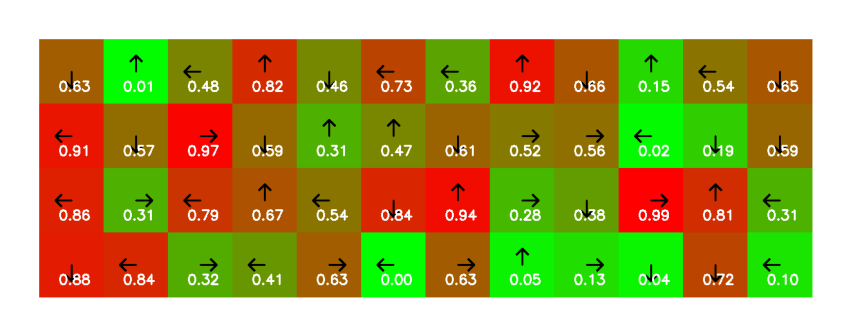

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def display_policy(policy_table, value_table):


  grid_width = 12
  grid_height = 4
  square_side = 100

  margin = 50

  height = square_side * (grid_height + 1)
  width = square_side * (grid_width + 1)

  image = np.zeros((height,width,3), np.uint8)
  image.fill(255)
  
  color = (0, 0, 0)
  thickness = 2

  arrow_margin = 25

  text_offset = (-20, 30)

  max_val = np.max(value_table)
  min_val = np.min(value_table)

  min_col = np.array([255.0, 0.0, 0.0])
  max_col = np.array([0.0, 255.0, 0.0])

  for x in range(0, policy_table.shape[1]):
    for y in range(0, policy_table.shape[0]):

      value = value_table[y][x]

      interp_fac = (value - min_val) / (max_val - min_val)
      interp_col = interp_fac * min_col + (1.0 - interp_fac) * max_col
      interp_col = (interp_col.astype(np.int).tolist())

      start_point = (margin + square_side * x, margin + square_side * y)
      end_point = (margin + square_side * (x + 1), margin + square_side * (y + 1))

      cv2.rectangle(image, start_point, end_point, interp_col, cv2.FILLED)

      x_offset = [0, square_side / 2.0 - arrow_margin, 0, -square_side / 2.0 + arrow_margin]
      y_offset = [-square_side / 2.0 + arrow_margin, 0, square_side / 2.0 - arrow_margin, 0]

      action = policy_table[y][x]
      arrow_start = (int(start_point[0] +  square_side / 2.0), int(start_point[1] +  square_side / 2.0))
      arrow_end = (int(np.round(arrow_start[0] + x_offset[action])), int(np.round(arrow_start[1] + y_offset[action])))

      cv2.arrowedLine(image, arrow_start, arrow_end, color, thickness, tipLength = 0.5) 

      text_pos = (arrow_start[0] + text_offset[0], arrow_start[1] + text_offset[1])
      cv2.putText(image, '%.2f' % (value_table[y][x]), text_pos, cv2.FONT_ITALIC, .7, (255, 255, 255), 2)
  
  
  plt.figure(figsize=(15,15))
  plt.axis('off')
  plt.imshow(image)
  
  plt.show()


## Example of how to use with just random actions and values
rand_actions = np.random.randint(4, size=(4, 12))
rand_values = np.random.rand(4, 12)

display_policy(rand_actions, rand_values)

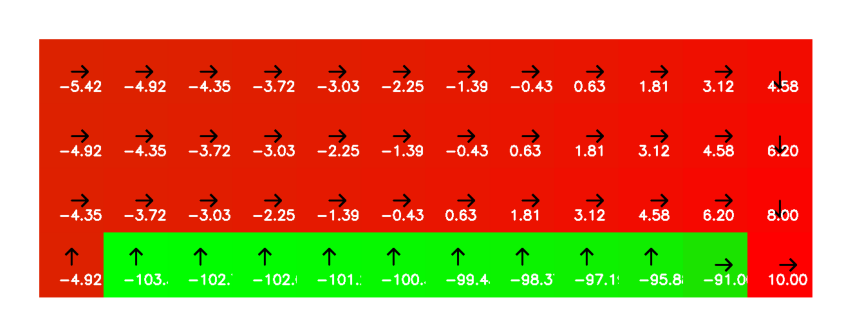

In [ ]:

value_table = np.zeros((env.height,env.width))
prev_val_table = np.zeros((env.height,env.width))
policy_table = np.ones((env.height,env.width),dtype=int)
rewards = np.zeros((env.height,env.width))

#Setting state reward
for i in range(env.height):
  for j in range(env.width):
    rewards[i][j] = env.state_reward((i,j))

#action space
A = {0:(-1,0),1:(0,1),2:(1,0),3:(0,-1)}
#Value iteration
eps=1
for _ in range(10000):
  prev_val_table = value_table
  for i in range(env.height):
    for j in range(env.width):
      I,J = i,j
      val = -200
      for a in range(4):
        x,y = A[a]
        I,J = i+x,j+y
        I,J = max(0,I),max(0,J)
        I,J = min(I,env.height-1),min(J,env.width-1)
        if(prev_val_table[I][J]>val):
          val = prev_val_table[I][J]
          optim_action=a
        

        
      value_table[i][j] = rewards[i][j]+0.9*val
      policy_table[i][j] = optim_action
      eps = np.linalg.norm(value_table-prev_val_table)
  
display_policy(policy_table,value_table)





In [ ]:
env.reset()
done = False
while done==False:
  action = policy_table[env.S[0]][env.S[1]]
  print('state: ',env.S,' action:',action)
  _,_,done,_ = env.step(action)


state:  (3, 0)  action: 0
state:  (2, 0)  action: 1
state:  (2, 1)  action: 1
state:  (2, 2)  action: 1
state:  (2, 3)  action: 1
state:  (2, 4)  action: 1
state:  (2, 5)  action: 1
state:  (2, 6)  action: 1
state:  (2, 7)  action: 1
state:  (2, 8)  action: 1
state:  (2, 9)  action: 1
state:  (2, 10)  action: 1
state:  (2, 11)  action: 2


# Deep Q-Learning with Cart Pole




In [ ]:
import gym

env = gym.make('CartPole-v0')

In [ ]:
print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)
print(env.action_space)

Box(4,)
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
Discrete(2)


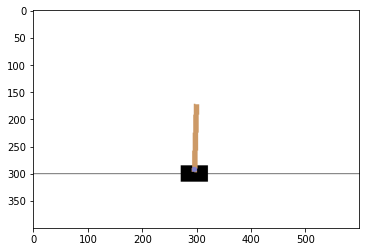

In [ ]:
import matplotlib.pyplot as plt
env = gym.make('CartPole-v0')
state = env.reset()
state
img = plt.imshow(env.render('rgb_array'))

In [ ]:
def calculate_loss(gamma, reward, Q_t, Q_next):
 
  loss= F.smooth_l1_loss(reward + gamma*Q_next, Q_t.squeeze())
  return loss

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class DQNetwork(nn.Module):
  
    def __init__(self): 
      super(DQNetwork, self).__init__()
      self.fc1 = nn.Linear(4,64)
      self.fc2 = nn.Linear(64,2)

    def forward(self,x):
      x = F.elu(self.fc1(x))
      x = self.fc2(x)
      return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
env = gym.make('CartPole-v0')
model = DQNetwork().to(device)
optim = torch.optim.Adam(model.parameters(), 0.001)
replaybuffer = ReplayBuffer(100000)

In [ ]:
class ReplayBuffer:

  def __init__(self, capacity=100):

    self.memory = []
    self.capacity = capacity
    self.position = 0
    

  def push(self, replay):

    if self.position == self.capacity:
      self.memory.pop(0)
      self.position -= 1

    self.memory.append(replay)
    self.position += 1

  def sample(self, batch_size):

    return random.sample(self.memory, batch_size)

  def __len__(self):

    return self.position

In [ ]:
import random
def epsilon_greedy_action(q_values, epsilon):

    if random.random() < epsilon:
      return torch.argmax(q_values).item()
    else:
      return random.randrange(2)

In [ ]:
def learn():

  if len(replaybuffer) < 20:
    
    return None
  sample_batch = replaybuffer.sample(20)
  state = torch.FloatTensor([np.array(s[0]) for s in sample_batch]).to(device)
  action = torch.LongTensor([s[1] for s in sample_batch]).to(device)
  next_state = torch.FloatTensor([np.array(s[2]) for s in sample_batch]).to(device)
  reward = torch.FloatTensor([s[3] for s in sample_batch]).to(device)  
  current_qvalues = model(state)
  current_qvalues = current_qvalues.gather(1,action.unsqueeze(1))
  next_qvalues = model(next_state).detach()
  next_qvalues, _ = torch.max(next_qvalues,1) 
  next_qvalues[reward==0] = 0
  loss = calculate_loss(GAMMA, reward, current_qvalues, next_qvalues)
  optim.zero_grad() 
  loss.backward()
  optim.step()
  return loss.item()

In [ ]:
import math

def run_episode():

  state = env.reset()
  tot_reward=0
  tot_loss = []
  while True:

    state = torch.FloatTensor(state).to(device)
    with torch.no_grad():
      q_val = model(state)      
    epsilon = 1 - (EPSILON_MIN + (EPSILON_MAX - EPSILON_MIN) * math.exp(-1. * i / DECAY))
    action = epsilon_greedy_action(q_val, epsilon)

    next_state, reward, done, _ = env.step(action)
    reward = 0 if done == True else reward

    replaybuffer.push((state.cpu().numpy(), action, next_state, reward))
    state = next_state
    loss = learn()
    if loss is not None:
      tot_loss.append(loss) 
    tot_reward += reward  
    if done:
      avg_loss = sum(tot_loss)/len(tot_loss) if len(tot_loss)!=0 else None
      return avg_loss, tot_reward

Episode no:  0 Avg reward over 10 episodes 1.9
Episode no:  10 Avg reward over 10 episodes 27.8
Episode no:  20 Avg reward over 10 episodes 24.3
Episode no:  30 Avg reward over 10 episodes 26.6
Episode no:  40 Avg reward over 10 episodes 26.2
Episode no:  50 Avg reward over 10 episodes 43.8
Episode no:  60 Avg reward over 10 episodes 43.5
Episode no:  70 Avg reward over 10 episodes 70.4
Episode no:  80 Avg reward over 10 episodes 109.9
Episode no:  90 Avg reward over 10 episodes 116.9
Episode no:  100 Avg reward over 10 episodes 107.5
Episode no:  110 Avg reward over 10 episodes 137.6
Episode no:  120 Avg reward over 10 episodes 186.9
Episode no:  130 Avg reward over 10 episodes 189.8
Episode no:  140 Avg reward over 10 episodes 199.0
Episode no:  150 Avg reward over 10 episodes 186.6
Episode no:  160 Avg reward over 10 episodes 199.0
Episode no:  170 Avg reward over 10 episodes 199.0
Episode no:  180 Avg reward over 10 episodes 196.6
Episode no:  190 Avg reward over 10 episodes 199.0


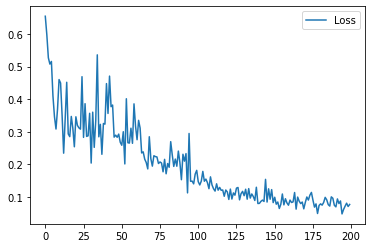

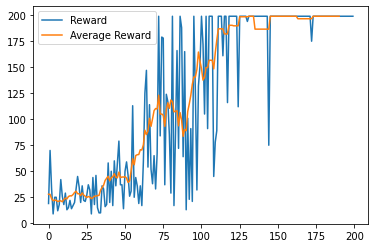

In [ ]:
import matplotlib.pyplot as plt
import gym
import numpy as np

GAMMA = 0.9
EPSILON_MIN = 0.1
EPSILON_MAX = 0.9
DECAY = 100
lgraph = []
rgraph = []
EPISODES =200 


reward10=0
for i in range(EPISODES):
  loss, reward = run_episode()
  reward10+=reward
  if i%10==0:
    print("Episode no: ",i,"Avg reward over 10 episodes" ,reward10/10)
    reward10=0
  lgraph.append(loss)
  rgraph.append(reward)

running_avg_reward = np.convolve(rgraph, np.ones((10,))/10, mode='valid')
plt.plot(lgraph,label='Loss')
plt.legend(['Loss'])
plt.show()
plt.plot(rgraph,label='Reward')
plt.plot(running_avg_reward,label='Average Reward')
plt.legend(['Reward','Average Reward'])
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import cv2

class Video:

  def __init__(self):
    self.curr_episode_buffer = []
    self.full_video_buffer = []
    self.max_reward = 0

  def add_frame(self, env, episode):
    frame = env.render(mode='rgb_array')
    font = cv2.FONT_HERSHEY_SIMPLEX
    frame = cv2.putText(frame, f'Episode: {episode}',(50,350), font, .5,(0,0,0),1)
    frame = cv2.putText(frame, f'Reward: {len(self.curr_episode_buffer) + 1}',(150,350), font, .5,(0,0,0),1)
    self.curr_episode_buffer.append(frame)

    pass
  def done(self, total_reward):
    if total_reward > self.max_reward:
      self.max_reward = total_reward
      self.full_video_buffer.extend(self.curr_episode_buffer)
    self.curr_episode_buffer = []

  def generate_video_at_path(self, path):

    all_frames = cool_video.full_video_buffer

    framerate = 30
    fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    frame_shape = (400, 600)
    video_writer = cv2.VideoWriter(path, fourcc, framerate, (frame_shape[1], frame_shape[0]), True)

    for frame in all_frames:
      video_writer.write(frame)

    video_writer.release()

cool_video = Video()